In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

In [2]:
raw_train_data = pd.read_csv("train.csv")
train_data = pd.DataFrame()

In [3]:
raw_train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data["Survived"] = raw_train_data["Survived"]
train_data["Pclass"] = raw_train_data["Pclass"]
train_data["SibSp"] = raw_train_data["SibSp"]
train_data["Parch"] = raw_train_data["Parch"]



In [5]:
encoder = LabelEncoder()
train_data["Sex"] = encoder.fit_transform(raw_train_data["Sex"])
train_data["Embarked"] =  encoder.fit_transform(raw_train_data["Embarked"])


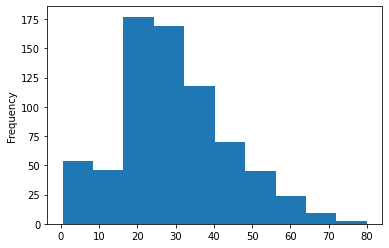

In [6]:
raw_train_data["Age"].plot(kind="hist")
age_cat_list = []
for i in raw_train_data["Age"]:
    int_i = 0
    if np.isnan(i):
        int_i = 0
    else:
        int_i = int(i)
    if int_i == 0:
        age_cat_list.append(0)
    elif int_i > 0 and int_i <= 20:
        age_cat_list.append(1)
    elif int_i > 20 and int_i <= 50:
        age_cat_list.append(2)
    elif int_i > 50:
        age_cat_list.append(3)
train_data["Age"] = age_cat_list

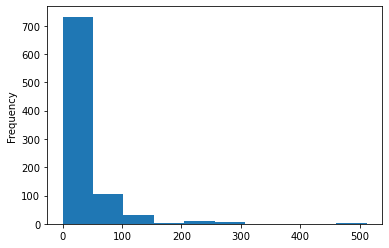

In [7]:
raw_train_data["Fare"].plot(kind="hist")
fare_cat_list = []
for i in raw_train_data["Fare"]:
    int_i = 0
    if np.isnan(i):
        int_i = 0
    else:
        int_i = int(i)
    if int_i == 0:
        fare_cat_list.append(0)
    elif int_i > 0 and int_i <= 20:
        fare_cat_list.append(1)
    elif int_i > 20 and int_i <= 40:
        fare_cat_list.append(2)
    elif int_i > 40 and int_i <= 60:
        fare_cat_list.append(3)
    elif int_i > 60 and int_i <= 80:
        fare_cat_list.append(4)
    elif int_i > 80 and int_i <= 100:
        fare_cat_list.append(5)
    elif int_i > 100:
        fare_cat_list.append(6)
train_data["Fare"] = fare_cat_list

In [8]:
train_data.head()


,Survived,Pclass,SibSp,Parch,Sex,Embarked,Age,Fare
0,0,3,1,0,1,2,2,1
1,1,1,1,0,0,0,2,4
2,1,3,0,0,0,2,2,1
3,1,1,1,0,0,2,2,3
4,0,3,0,0,1,2,2,1


In [9]:
Y = train_data["Survived"]
X = train_data.copy(deep = True)

X = X.drop(columns=["Survived"])

In [10]:
X.head()

,Pclass,SibSp,Parch,Sex,Embarked,Age,Fare
0,3,1,0,1,2,2,1
1,1,1,0,0,0,2,4
2,3,0,0,0,2,2,1
3,1,1,0,0,2,2,3
4,3,0,0,1,2,2,1


In [11]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_train
X_test
y_train
y_test

495    0
648    0
278    0
31     1
255    1
      ..
627    1
380    1
483    1
516    1
505    0
Name: Survived, Length: 90, dtype: int64

In [13]:
X_train.reset_index(drop=True)

,Pclass,SibSp,Parch,Sex,Embarked,Age,Fare
0,1,0,0,1,2,0,0
1,3,0,0,1,2,1,1
2,2,1,1,1,2,1,2
3,1,0,1,0,0,2,3
4,3,3,2,0,2,1,2
...,...,...,...,...,...,...,...
796,1,1,1,0,0,2,5
797,3,1,0,0,2,1,1
798,3,0,0,1,1,0,1
799,3,1,0,0,2,2,1


In [14]:
y_train.reset_index(drop=True)

0      0
1      0
2      1
3      1
4      0
      ..
796    1
797    1
798    0
799    1
800    0
Name: Survived, Length: 801, dtype: int64

In [15]:
cnb = CategoricalNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [17]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
627    1
380    1
483    1
516    1
505    0
Name: Survived, Length: 90, dtype: int64

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='micro')

0.7888888888888889

In [19]:
dump(cnb,"cnbmodel")

['cnbmodel']